In [98]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.style as mplstyle
import matplotlib.colorbar
mplstyle.use('fast')

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read CSV
city_path = os.path.join("data/city_data.csv")
ride_path = os.path.join("data/ride_data.csv")
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

#Merging Data

combined_data_df = pd.merge(city_data, ride_data, on="city")
combined_data_df.head(10)

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [99]:
# Create Bubble Chart
# Obtain the x and y coordinates for each of the three city types -- # Urban Suburban Rural

# x: Count of rides per city
total_rides = combined_data_df.groupby(by='city')['ride_id'].count()
 
# y: Average fare in each city
average_fare = round(combined_data_df.groupby(by='city')['fare'].mean(),2)

# z: Driver count for each city
total_drivers = combined_data_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*8

# Color based on the type for each city
city_type_list = combined_data_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']

# Create dataframe
Plot_Data_df = pd.DataFrame({'x':total_rides,'y':average_fare,'z':total_drivers,'City Type':city_type_list})
Plot_Data_df.head(10)



,x,y,z,City Type
Amandaburgh,18,24.64,96,Urban
Barajasview,22,25.33,208,Urban
Barronchester,16,36.42,88,Suburban
Bethanyland,18,32.96,176,Suburban
Bradshawfurt,10,40.06,56,Rural
Brandonfort,19,35.44,80,Suburban
Carriemouth,27,28.31,416,Urban
Christopherfurt,27,24.50,328,Urban
Colemanland,22,30.89,184,Suburban
Davidfurt,17,32.00,184,Suburban


In [100]:
# Color list
color_list = {'Urban':'yellow', 'Suburban':'orange', 'Rural': 'ltblue'}
color_list

{'Urban': 'yellow', 'Suburban': 'orange', 'Rural': 'ltblue'}

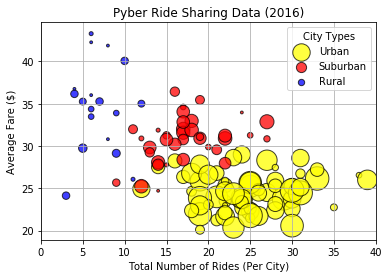

In [102]:
# Build the scatter plots for each city types
# plt.scatter(x_list, y_list, s=z_list, alpha=0.75)

plt.scatter(Plot_Data_df[Plot_Data_df['City Type']=="Urban"]['x'],
            Plot_Data_df[Plot_Data_df['City Type']=="Urban"]['y'], 
            s=Plot_Data_df[Plot_Data_df['City Type']=="Urban"]['z'], 
            facecolors="yellow", edgecolors="black", alpha=0.75, label = "Urban")

plt.scatter(Plot_Data_df[Plot_Data_df['City Type']=="Suburban"]['x'],
            Plot_Data_df[Plot_Data_df['City Type']=="Suburban"]['y'], 
            s=Plot_Data_df[Plot_Data_df['City Type']=="Suburban"]['z'], 
            facecolors="red", edgecolors="black", alpha=0.75, label = "Suburban")

plt.scatter(Plot_Data_df[Plot_Data_df['City Type']=="Rural"]['x'],
            Plot_Data_df[Plot_Data_df['City Type']=="Rural"]['y'], 
            s=Plot_Data_df[Plot_Data_df['City Type']=="Rural"]['z'], 
            facecolors="blue", edgecolors="black", alpha=0.75, label = "Rural")

# Incorporate the other graph properties and create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend(title = 'City Types')
plt.xlim((0,40))
plt.grid(True)


# Incorporate a text label regarding circle size

# Save Figure

# Show plot
plt.show()


## Total Fares by City Type

In [89]:
# Calculate Type Percents

type_percents = 100 * combined_data_df.groupby(["type"]).sum() ["fare"] / combined_data_df["fare"].sum()
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

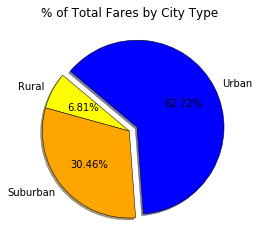

In [90]:
# Build Pie Chart

plt.pie(type_percents, 
       labels=["Rural", "Suburban", "Urban"],
       colors=["yellow", "orange", "blue"],
       explode=[0, 0, 0.1],
       autopct='%.2f%%',
       shadow=True,
       startangle=140,
       wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()

## Total Rides by City Type

In [91]:
# Calculate Ride Percents

ride_percents = 100 * combined_data_df.groupby(["type"]).count()["ride_id"] / combined_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

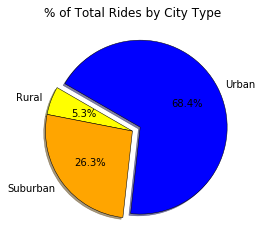

In [92]:
# Build Pie Chart

plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["yellow", "orange", "blue"],
       explode=[0, 0, 0.1],
       autopct='%.1f%%',
       shadow=True,
       startangle=150,
       wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig
    
# Show Figure
plt.show()



## Total Drivers by City Type

In [93]:
# Calculate Driver Percents

driver_percents = 100 * combined_data_df.groupby(["type"]).sum()["driver_count"] / combined_data_df["driver_count"].sum()
driver_percents


type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

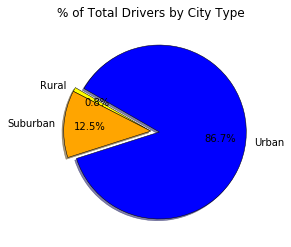

In [94]:
# Build Pie Charts

plt.pie(driver_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["yellow", "orange", "blue"],
       explode=[0, 0, 0.1],
       autopct='%.1f%%', pctdistance=0.70,
       shadow=True, startangle=150,
       wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})
plt.title("% of Total Drivers by City Type")

# Save Figure

# Show Figure
plt.show()